In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Spotify Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [3]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [4]:
#Convert 'WeekID' to DateTime Object & Check First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
18553,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,63,High School Confidential,Jerry Lee Lewis And His Pumping Piano,High School ConfidentialJerry Lee Lewis And His Pumping Piano,1,NaN,63,1
103337,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,98,Little Serenade,The Ames Brothers,Little SerenadeThe Ames Brothers,1,NaN,98,1
300806,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,61,Almost Maybes,Jordan Davis,Almost MaybesJordan Davis,2,64.0,61,17
152154,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,78,White Teeth,YoungBoy Never Broke Again,White TeethYoungBoy Never Broke Again,1,NaN,78,1


In [5]:
#Merge BB100 with Spotify Features
bb100_features = pd.merge(bb100, features, on='SongID', how='left')
bb100_features.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Performer_y,Song_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
11977,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,89,Blue Boy,Jim Reeves,Blue BoyJim Reeves,1,NaN,89,1,Jim Reeves,Blue Boy,"['adult standards', 'nashville sound', 'rock-and-roll']",05k40oRJ58mQBJSAz0FkLI,https://p.scdn.co/mp3-preview/80d3e13c406f8251e5bee84366353b09f630dfff?cid=b8d3901151d34489a160e3cf0ab1fa94,129333.0,0.0,The Essential Jim Reeves,0.613,0.372,0.0,-13.051,1.0,0.0299,0.7850,0.00154,0.115,0.697,98.549,4.0,24.0
1014,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,6,Rebel-'rouser,Duane Eddy His Twangy Guitar And The Rebels,Rebel-'rouserDuane Eddy His Twangy Guitar And The Rebels,1,NaN,6,1,Duane Eddy His Twangy Guitar And The Rebels,Rebel-'rouser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263155,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,70,Quicksand,Morray,QuicksandMorray,1,66.0,65,15,Morray,Quicksand,[],4iCZ6Cr76For1TuHUQ90r8,https://p.scdn.co/mp3-preview/5145f491144ef1468d624cfc0203c2d22ba896dc?cid=b8d3901151d34489a160e3cf0ab1fa94,224933.0,1.0,"{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/44vREmJC0OlVZjZaGLqVEd'}, 'href': 'https://api.spotify.com/v1/artists/44vREmJC0OlVZjZaGLqVEd', 'i...",0.901,0.656,4.0,-7.452,0.0,0.2770,0.0807,0.00000,0.181,0.599,119.956,4.0,71.0
7816,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,28,hunger.on.hillside,J. Cole & Bas,hunger.on.hillsideJ. Cole & Bas,1,NaN,28,1,J. Cole & Bas,hunger.on.hillside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_genre = bb100_features[['SongID', 'spotify_genre']]
df_genre.isnull().sum()

SongID               0
spotify_genre    14586
dtype: int64

In [7]:
df_genre['spotify_genre'].replace({"[]":np.nan}, inplace=True)
#df_genre['spotify_genre'].value_counts()
df_genre.isnull().sum()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


SongID               0
spotify_genre    37651
dtype: int64

In [8]:
df_genre.dropna(subset=['spotify_genre'], inplace=True)
df_genre.isnull().sum()

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


SongID           0
spotify_genre    0
dtype: int64

In [9]:
#Noticing that Spotify_Genre Values is an Array
arr = df_genre['spotify_genre'].values

In [10]:
#Important Conversion to list of genres for items in Array
out = [i.replace('\'', '').replace('[','').replace(']','').replace('"','').split(", ") for i in arr]

In [11]:
#Apply "Explode" on new Dataframe with Key Inputs: 
Genres_Explode = pd.DataFrame({'SongID':df_genre.SongID, 'Genres':out}).explode('Genres')

In [12]:
#View Result of Exploding
Genres_Explode

,SongID,Genres
0,Don't Just Stand TherePatty Duke,deep adult standards
1,Don't Just Stand TherePatty Duke,deep adult standards
2,Don't Just Stand TherePatty Duke,deep adult standards
3,Don't Just Stand TherePatty Duke,deep adult standards
4,Don't Just Stand TherePatty Duke,deep adult standards
...,...,...
330459,Here I Am Come & Take MeAl Green,memphis soul
330459,Here I Am Come & Take MeAl Green,quiet storm
330459,Here I Am Come & Take MeAl Green,soul
330459,Here I Am Come & Take MeAl Green,soul blues


In [13]:
#Groupby Genres & Count
Genres = Genres_Explode.groupby('Genres').count().reset_index()
Genres

,Genres,SongID
0,21st century classical,3
1,a cappella,316
2,acid house,79
3,acid jazz,95
4,acoustic blues,37
...,...,...
1140,ye ye,24
1141,yodeling,371
1142,yugoslav rock,162
1143,zolo,520


In [14]:
Genres = Genres.sort_values(by='SongID', ascending=False).head(10)
Genres

,Genres,SongID
292,dance pop,48245
668,mellow gold,47410
981,soft rock,46859
837,pop,46327
920,rock,39336
7,adult standards,36223
843,pop rap,34019
16,album rock,29440
1098,urban contemporary,28738
131,brill building pop,28736


<AxesSubplot:>

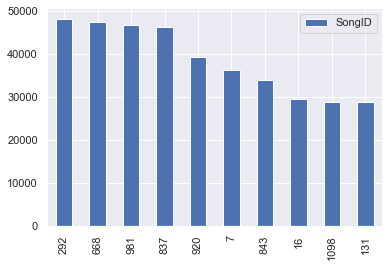

In [15]:
Genres.sort_values(by='SongID', ascending=False).head(10).plot.bar()

In [16]:
Count_List = Genres['SongID'].tolist()
Count_List

[48245, 47410, 46859, 46327, 39336, 36223, 34019, 29440, 28738, 28736]

In [17]:
Genre_Labels = Genres['Genres'].tolist()
Genre_Labels.reverse()

#Genre_Labels = Genre_Labels.reverse()
Genre_Labels

['brill building pop',
 'urban contemporary',
 'album rock',
 'pop rap',
 'adult standards',
 'rock',
 'pop',
 'soft rock',
 'mellow gold',
 'dance pop']

In [18]:
Genre_Labels

['brill building pop',
 'urban contemporary',
 'album rock',
 'pop rap',
 'adult standards',
 'rock',
 'pop',
 'soft rock',
 'mellow gold',
 'dance pop']

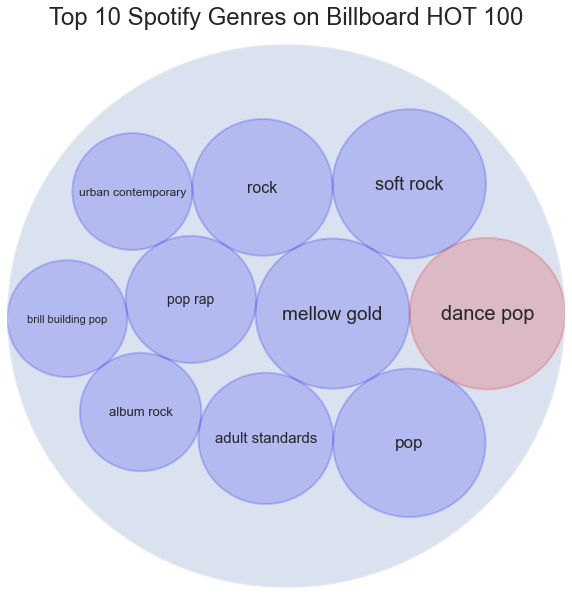

In [19]:
# import libraries
import circlify

# compute circle positions:
circles = circlify.circlify(
    Count_List, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1),
    show_enclosure=False)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Top 10 Spotify Genres on Billboard HOT 100', fontsize=24, pad=20)

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = Genre_Labels

# List of font sizes
sizes = [11,12,13,14,15,16,17,18,19,20]

#List of colors, just differentiate Max. 
colors = ['blue','blue','blue','blue', 'blue', 'blue', 
          'blue', 'blue','blue', 'red']

# print circles
for circle, label, size, color in zip(circles, labels, sizes, colors):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2, color=color))
    plt.annotate(
          label,
          (x,y), fontsize=size, 
          va='center',
          ha='center')

ax.add_patch(plt.Circle((0,0), 1, alpha=0.2, linewidth=3));

#plt.savefig('Spotify_Bubbles_Burst.png');

#pprint(circles)
#circlify.bubbles(circles=circles)